# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

training_file = "./data/train.p"
validation_file = "./data/valid.p"
testing_file = "./data/test.p"
signnames_file = "./data/signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

X_original_train = X_train
X_original_valid = X_valid
X_original_test = X_test

y_original_train = y_train
y_original_valid = y_valid
y_original_test = y_test

print("Training  %d" % (len(X_train)))
print("Validation  %d" % (len(X_valid)))
print("Test  %d" % (len(X_test)))

Training  34799
Validation  4410
Test  12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(0) Speed limit (20km/h)


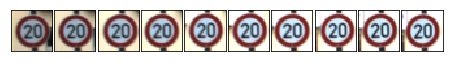


(1) Speed limit (30km/h)


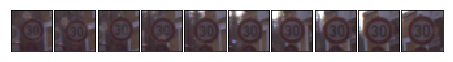


(2) Speed limit (50km/h)


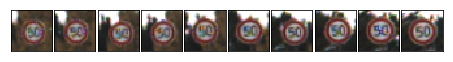


(3) Speed limit (60km/h)


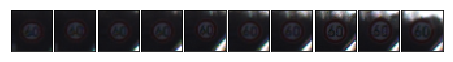


(4) Speed limit (70km/h)


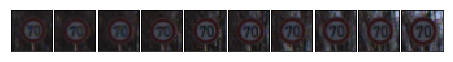


(5) Speed limit (80km/h)


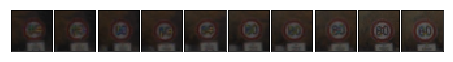


(6) End of speed limit (80km/h)


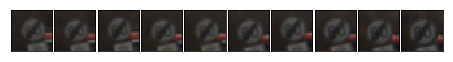


(7) Speed limit (100km/h)


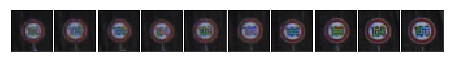


(8) Speed limit (120km/h)


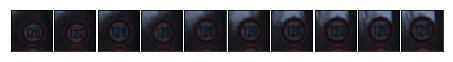


(9) No passing


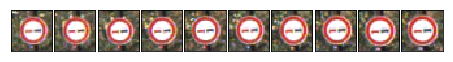


(10) No passing for vehicles over 3.5 metric tons


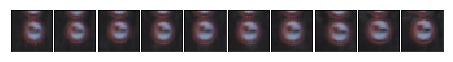


(11) Right-of-way at the next intersection


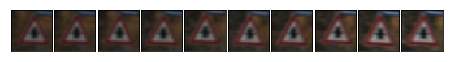


(12) Priority road


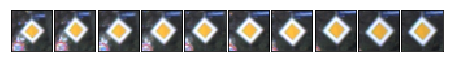


(13) Yield


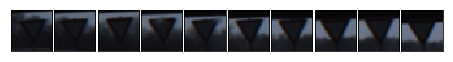


(14) Stop


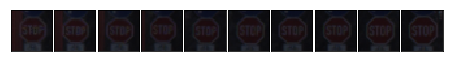


(15) No vehicles


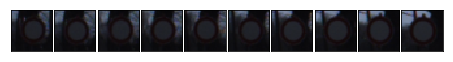


(16) Vehicles over 3.5 metric tons prohibited


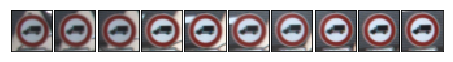


(17) No entry


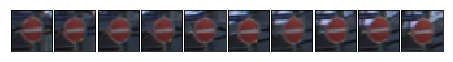


(18) General caution


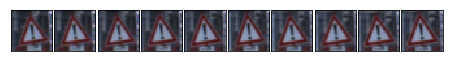


(19) Dangerous curve to the left


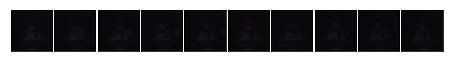


(20) Dangerous curve to the right


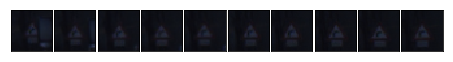


(21) Double curve


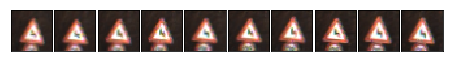


(22) Bumpy road


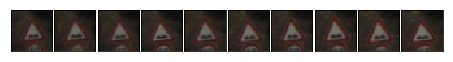


(23) Slippery road


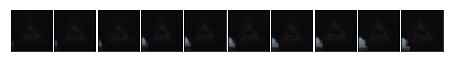


(24) Road narrows on the right


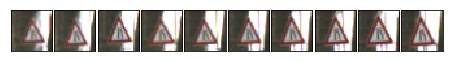


(25) Road work


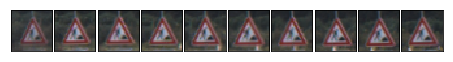


(26) Traffic signals


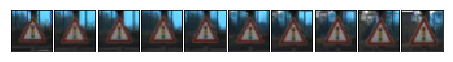


(27) Pedestrians


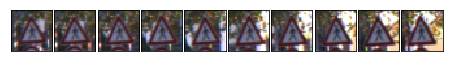


(28) Children crossing


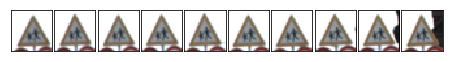


(29) Bicycles crossing


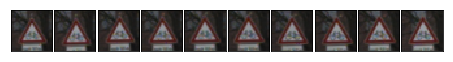


(30) Beware of ice/snow


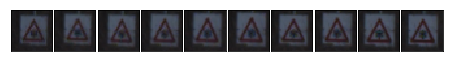


(31) Wild animals crossing


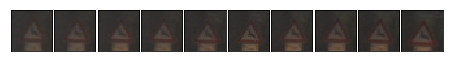


(32) End of all speed and passing limits


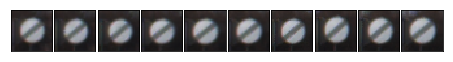


(33) Turn right ahead


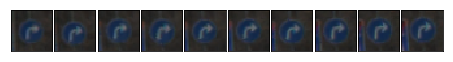


(34) Turn left ahead


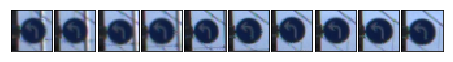


(35) Ahead only


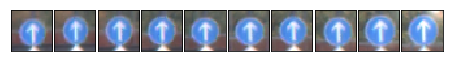


(36) Go straight or right


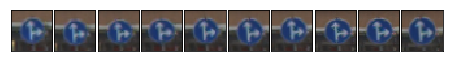


(37) Go straight or left


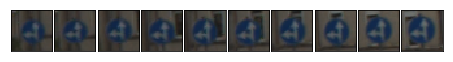


(38) Keep right


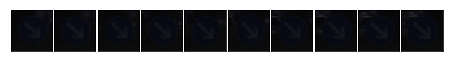


(39) Keep left


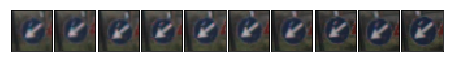


(40) Roundabout mandatory


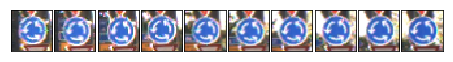


(41) End of no passing


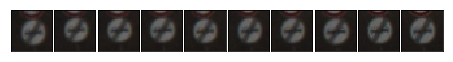


(42) End of no passing by vehicles over 3.5 metric tons


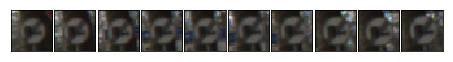

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


for sign in range(43):
    print("(%s) %s" % (sign, sign_names[sign]))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    indices = [i for i, x in enumerate(y_train) if x == sign]
    for i in range(min(len(indices), 10)):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[indices[i]])       
    plt.show()
    print ()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from keras.preprocessing.image import ImageDataGenerator
import scipy
from PIL import Image

def normalize(dataset):
    #return (dataset - dataset.mean())/ (np.max(dataset) - np.min(dataset))
    return np.multiply((dataset - 128.0), 1.0 / (128.0))

def convert_to_yuv(input_img):
    return cv2.cvtColor(input_img, cv2.COLOR_RGB2YUV)


def get_zca_matrix(dataset):
    flat_x = np.reshape(dataset, (dataset.shape[0], dataset.shape[1] * dataset.shape[2] * dataset.shape[3]))
    sigma = np.dot(flat_x.T, flat_x) / flat_x.shape[0]
    U,S,V = np.linalg.svd(sigma)
    epsilon = 10e-7
    ZCAMatrix = np.dot(np.dot(U, np.diag(1.0/np.sqrt(S + epsilon))), U.T) #ZCA Whitening matrix
    return ZCAMatrix
    
def apply_zca_whitening(dataset):
    X_white = []
    ZCAMatrix = get_zca_matrix(dataset)
    print ("got zca matrix")
    for img in dataset:
        flatx = np.reshape(img, (img.size))
        print (flatx)
        whitex = np.dot(flatx, ZCAMatrix)
        x = np.reshape(whitex, (img.shape[0], img.shape[1], img.shape[2]))
        X_white.append(x)  #Data whitening
    return np.array(X_white)

# http://machinelearningmastery.com/image-augmentation-deep-learning-keras/

def generate_sample(datagen, X_sample, y_sample, count):
    datagen.fit(X_sample)
    iterator = datagen.flow(X_sample, y_sample, batch_size=count)
    generated_X, generated_y = [], []
    for i in range(count):
        X_batch, y_batch = iterator.next()
        for X in X_batch:
            generated_X.append(X)
        for y in y_batch:
            generated_y.append(y)

    return generated_X, generated_y

def generate_sample_shift(X_sample, y_sample, count):
    #datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
    #return generate_sample(datagen, X_sample, y_sample, count * 2)
    generated_X, generated_y = [], []
    cols, rows = X_sample.shape[1], X_sample.shape[2]
    width_shift_range = np.arange(-0.2 * cols, 0.2 * cols, 1)
    height_shift_range = np.arange(-0.2 * rows, 0.2 * rows, 1)
    for i in range(len(X_sample)): 
        for index in range(count * 2):
            M = np.float32([[1, 0, np.random.choice(width_shift_range)],\
                            [0, 1, np.random.choice(height_shift_range)]])
            generated_X.append(cv2.warpAffine(X_sample[i], M, (cols, rows)))
            generated_y.append(y_sample[i])
            
    return generated_X, generated_y

def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = scipy.ndimage.zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = scipy.ndimage.zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def generate_sample_rotation(X_sample, y_sample, count):
    generated_X, generated_y = [], []
    for i in range(len(X_sample)):
        for index in range(count):
            generated_X.append(
                scipy.ndimage.rotate(X_sample[i],
                                     np.random.choice(np.arange(-20, 20, 3)),
                                     reshape=False))
            generated_y.append(y_sample[i])

    return generated_X, generated_y

def generate_sample_zoom(X_sample, y_sample, count):
    generated_X, generated_y = [], []
    for i in range(len(X_sample)):
        for index in range(count):
            generated_X.append(clipped_zoom(X_sample[i], np.random.choice(np.arange(0, 1.5, 0.5))))
            generated_y.append(y_sample[i])

    return generated_X, generated_y


def generate_sample_flip(X_sample, y_sample, count):
    flips = [Image.FLIP_LEFT_RIGHT, 
             Image.FLIP_TOP_BOTTOM,
             Image.ROTATE_90,
             Image.ROTATE_180,
             Image.ROTATE_270,
             Image.TRANSPOSE]
    
    generated_X, generated_y = [], []
    for i in range(len(X_sample)):
        for index in range(count):
            img = Image.fromarray(X_sample[i])
            generated_X.append(np.array(img.transpose(np.random.choice(flips))))
            generated_y.append(y_sample[i])

    return generated_X, generated_y

def generate_transforms(X_sample, y_sample, count):
    generated_X, generated_y = [], []
    for i in range(len(X_sample)):
        for index in range(count):
            img = Image.fromarray(X_sample[i])
            width, height = img.size
            m = np.random.choice([-0.5, 0.5])
            xshift = abs(m) * width
            tmp_img = img.transform((width, height), Image.AFFINE,
                (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)

            generated_X.append(np.array(tmp_img))
            generated_y.append(y_sample[i])
            
    return generated_X, generated_y
  
def generate_training_data(X_sample, y_sample, count):
    generated_X = []
    generated_y = []
    tmp_X, tmp_y = generate_sample_shift(X_sample, y_sample, count)
    generated_X.extend(tmp_X)
    generated_y.extend(tmp_y)

    tmp_X, tmp_y = generate_sample_rotation(X_sample, y_sample, count)
    generated_X.extend(tmp_X)
    generated_y.extend(tmp_y)
    
    X_gen, y_gen = shuffle(np.array(tmp_X), np.array(tmp_y))

    tmp_X, tmp_y = generate_sample_shift(X_gen, y_gen, count)
    generated_X.extend(tmp_X)
    generated_y.extend(tmp_y)
        
    tmp_X, tmp_y = generate_sample_flip(X_sample, y_sample, count)
    generated_X.extend(tmp_X)
    generated_y.extend(tmp_y)
    
    tmp_X, tmp_y = generate_sample_zoom(X_sample, y_sample, count)
    generated_X.extend(tmp_X)
    generated_y.extend(tmp_y)
    
    tmp_X, tmp_y = generate_transforms(X_sample, y_sample, count)
    generated_X.extend(tmp_X)
    generated_y.extend(tmp_y)
    
    return generated_X, generated_y


Using TensorFlow backend.


10320
10320
(0) Speed limit (20km/h)


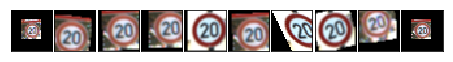


(1) Speed limit (30km/h)


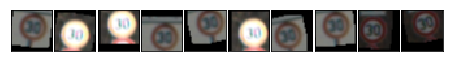


(2) Speed limit (50km/h)


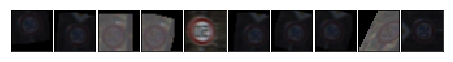


(3) Speed limit (60km/h)


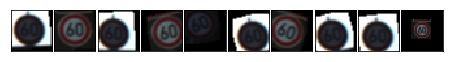


(4) Speed limit (70km/h)


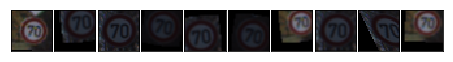


(5) Speed limit (80km/h)


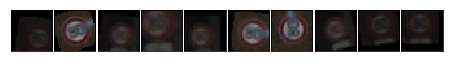


(6) End of speed limit (80km/h)


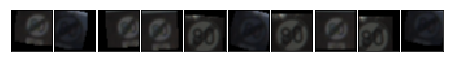


(7) Speed limit (100km/h)


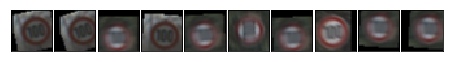


(8) Speed limit (120km/h)


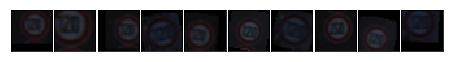


(9) No passing


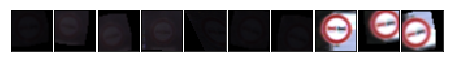


(10) No passing for vehicles over 3.5 metric tons


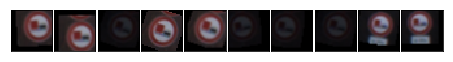


(11) Right-of-way at the next intersection


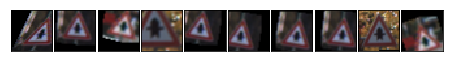


(12) Priority road


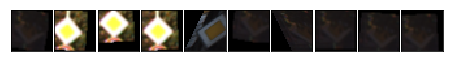


(13) Yield


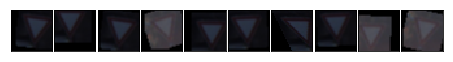


(14) Stop


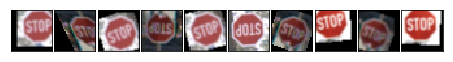


(15) No vehicles


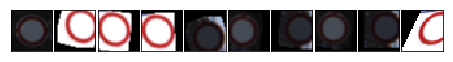


(16) Vehicles over 3.5 metric tons prohibited


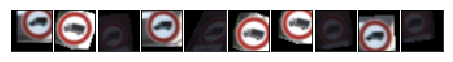


(17) No entry


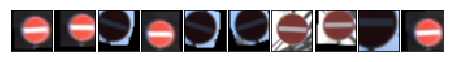


(18) General caution


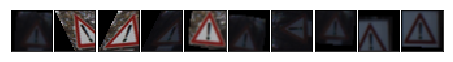


(19) Dangerous curve to the left


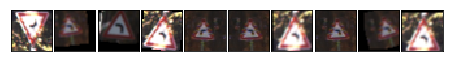


(20) Dangerous curve to the right


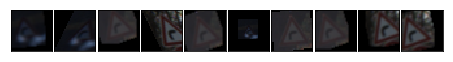


(21) Double curve


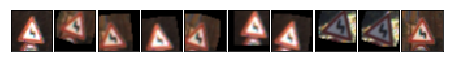


(22) Bumpy road


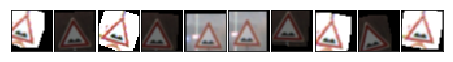


(23) Slippery road


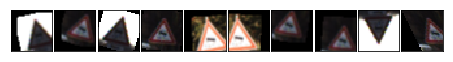


(24) Road narrows on the right


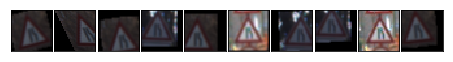


(25) Road work


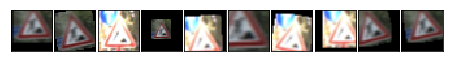


(26) Traffic signals


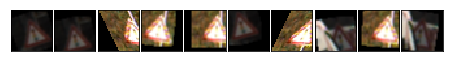


(27) Pedestrians


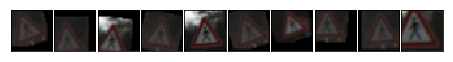


(28) Children crossing


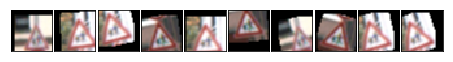


(29) Bicycles crossing


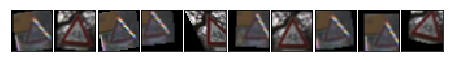


(30) Beware of ice/snow


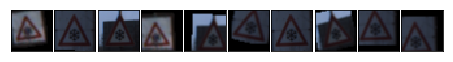


(31) Wild animals crossing


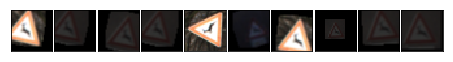


(32) End of all speed and passing limits


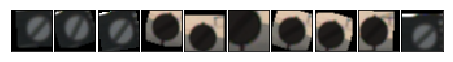


(33) Turn right ahead


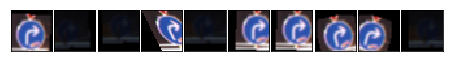


(34) Turn left ahead


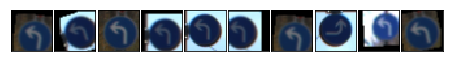


(35) Ahead only


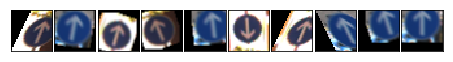


(36) Go straight or right


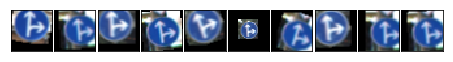


(37) Go straight or left


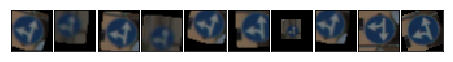


(38) Keep right


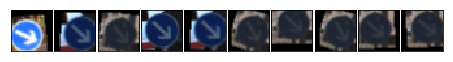


(39) Keep left


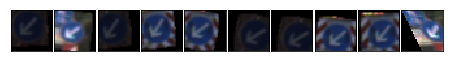


(40) Roundabout mandatory


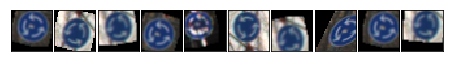


(41) End of no passing


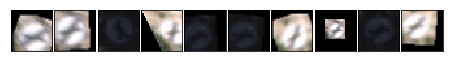


(42) End of no passing by vehicles over 3.5 metric tons


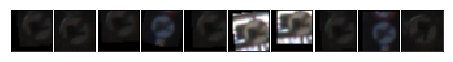


(45119, 32, 32, 3)
(45119,)


In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle

X_train = X_original_train
X_valid = X_original_valid
X_test = X_original_test

y_train = y_original_train
y_valid = y_original_valid
y_test = y_original_test

sample_size = 3
generation_per_modification = 20

generated = {}
generated_file = "./data/generated.p"
if os.path.exists("./data/generated.p"):
    with open(generated_file, mode='rb') as f:
        generated = pickle.load(f)

if len(generated) == 0:
    # generate images only if data doesn't already exists
    X_samples = []
    y_samples = []
    y_sample_count = {}

    # collect atleast three sample for each class. This will then be used to 
    # generate random features by rotation and shifting
    
    X_train, y_train = shuffle(X_train, y_train)
    
    for index in range(len(X_train)): 
        if sum(y_sample_count.values()) == sample_size * n_classes:
            break

        label = y_train[index]
        img = X_train[index]
    
        if not y_sample_count.get(label):
            y_sample_count[label] = 0
        
        
        if y_sample_count[label] >= sample_size:
            continue
            
        y_sample_count[label] += 1
        X_samples.append(img)
        y_samples.append(label)

    assert(len(X_samples) == len(y_samples))

    X_gen, y_gen = generate_training_data(np.array(X_samples), np.array(y_samples), generation_per_modification)
    
    generated['features'] = X_gen
    generated['labels'] = y_gen

    with open(generated_file, mode='wb+') as f:
        pickle.dump(generated, f)
    
X_gen, y_gen = generated['features'], generated['labels']
assert(len(X_gen) == len(y_gen))

print (len(X_gen))
print (len(y_gen))

X_gen, y_gen = shuffle(X_gen, y_gen)

for sign in range(43):
    print("(%s) %s" % (sign, sign_names[sign]))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    indices = [i for i, x in enumerate(y_gen) if x == sign]
    for i in range(min(len(indices), 10)):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_gen[indices[i]])       
    plt.show()
    print ()

X_train = np.concatenate((X_train, X_gen), axis=0)
y_train = np.concatenate((y_train, y_gen), axis=0)

# pre-process the images to convert the RGB to YUV still keeping depth as 3
#X_train = np.array([convert_to_yuv(img) for img in X_train])
#X_valid = np.array([convert_to_yuv(img) for img in X_valid])
#X_test = np.array([convert_to_yuv(img) for img in X_test])

# normalize the x inputs
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

#X_train = zca_whiten(X_train)
#X_valid = zca_whiten(X_valid)
#X_test = zca_whiten(X_test)

print (X_train.shape)
print (y_train.shape)

assert(len(X_train) == len(y_train))

X_train, y_train = shuffle(X_train, y_train)

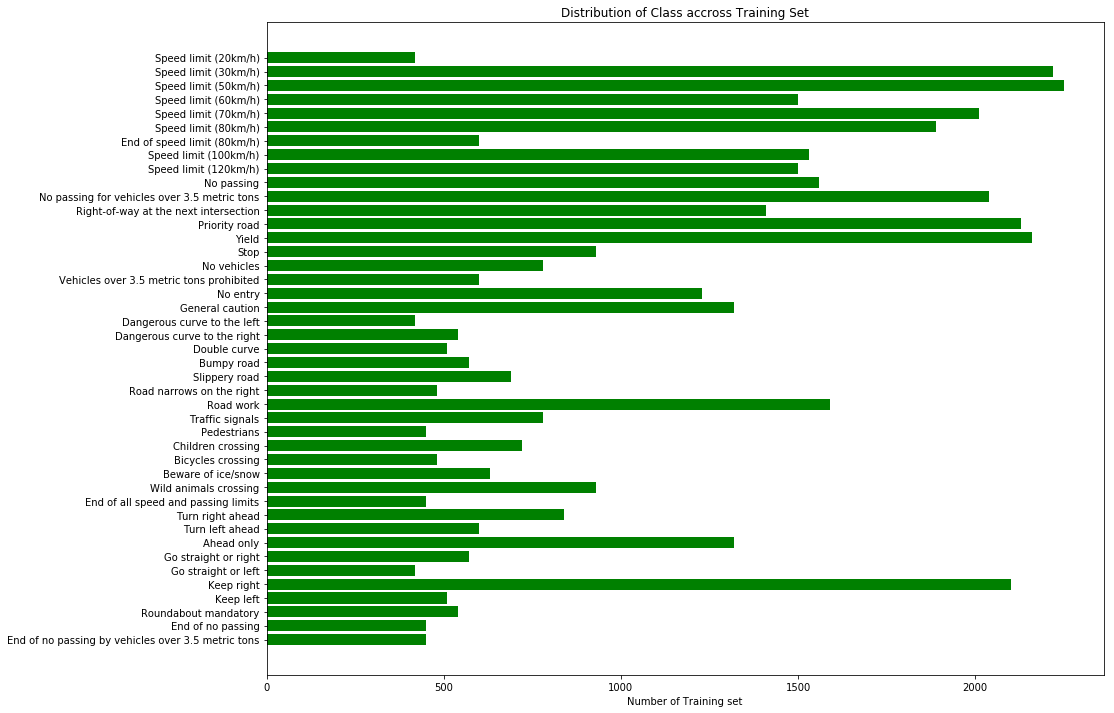

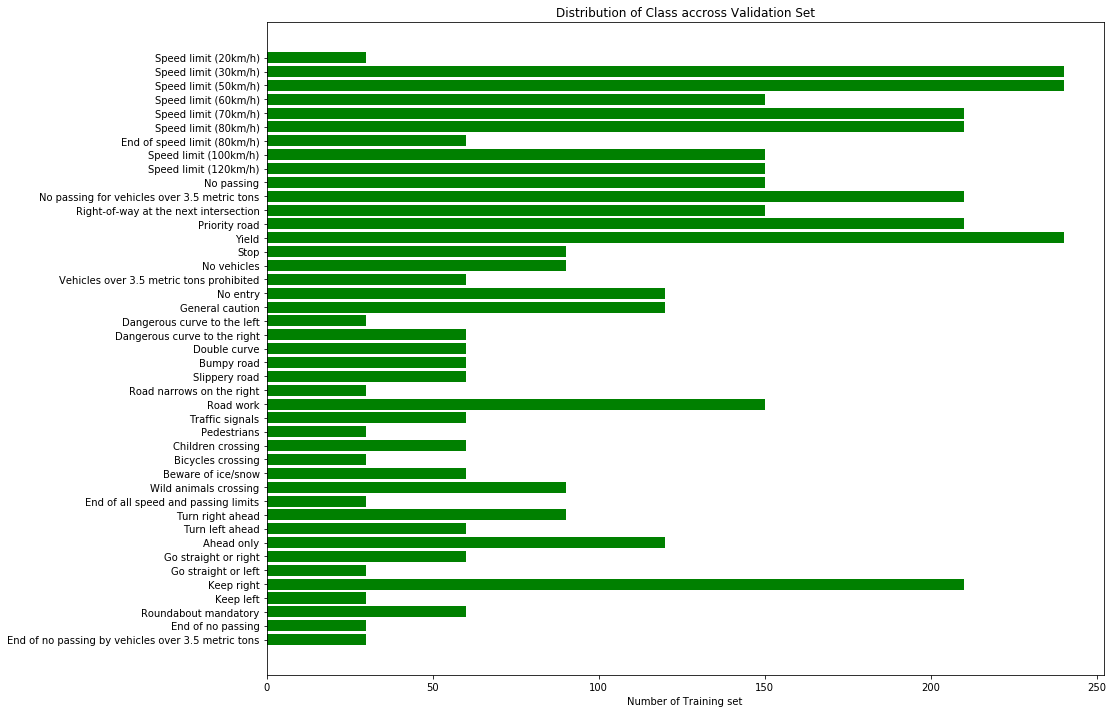

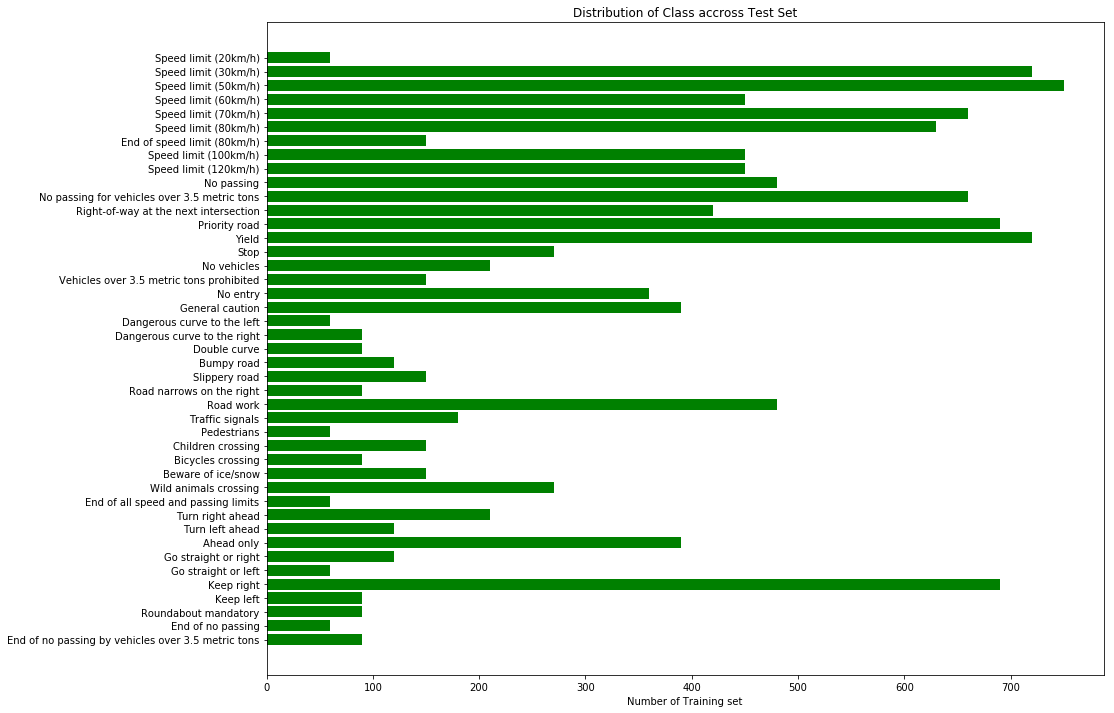

In [6]:
def plot_distribution(y_, set_type):
    # Count frequency of each label
    labels, x_counts = np.unique(y_, return_counts=True)
    y_labels = [sign_names[l] for l in labels]
    
    plt.rcParams["figure.figsize"] = [15, 12]
    ax = plt.gca()

    y_pos = np.arange(len(y_labels))

    ax.barh(y_pos, x_counts, align='center',
        color='green', ecolor='black')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_labels)
    ax.invert_yaxis()
    ax.set_xlabel('Number of Training set')
    ax.set_title('Distribution of Class accross %s Set' % set_type)
    
    plt.show()

plot_distribution(y_train, "Training")
plot_distribution(y_valid, "Validation")
plot_distribution(y_test, "Test")

In [7]:
EPOCHS = 100
BATCH_SIZE = 256

# Use dropout for regularization
dropout_conv = 0.7
dropout_fc = 0.5

keep_prob_conv = tf.placeholder(tf.float32)
keep_prob_fc = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [8]:
def define_weights_biases(mu, sigma):
    weights = {}
    biases = {}
    strides = {}
    pools = {}
    # input_depth = 3, output_depth = 6
    # input_height = 32, output_height = 30
    # input_width = 32, output_width = 30
    # weight_h = (32 - 3 + 1)/ 1 if stride_height = 1
    # weight_w = (32 - 3 + 1)/ 1 if stride_width = 1
    W_conv_01 = tf.Variable(tf.random_normal([5, 5, 3, 32], mean = mu, stddev = sigma))
    B_conv_01 = tf.Variable(tf.random_normal([32], mean = mu))
    stride_conv_01 = (1, 1, 1, 1)
    weights['layer_1'] = W_conv_01
    biases['layer_1'] = B_conv_01
    strides['layer_1'] = stride_conv_01
    # input_height = 30, output_height = 15
    # input_width = 30, output_width = 15
    # input_depth = 32, output_depth = 32
    pooling_kernel_01 = (1, 2, 2, 1)
    stride_pooling_02 = (1, 2, 2, 1)
    pools['layer_1'] = pooling_kernel_01
    # input_depth = 32, output_depth = 64
    # input_height = 15, output_height = 12
    # input_width = 15, output_width = 12
    # weight_h = (15 - 4 + 1)/ 1 if stride_height = 1
    # weight_w = (15 - 4 + 1)/ 1 if stride_width = 1
    W_conv_02 = tf.Variable(tf.random_normal([5, 5, 32, 128], mean = mu, stddev = sigma))
    B_conv_02 = tf.Variable(tf.random_normal([128], mean = mu))
    stride_conv_02 = (1, 1, 1, 1)
    weights['layer_2'] = W_conv_02
    biases['layer_2'] = B_conv_02
    strides['layer_2'] = stride_conv_02
    # input_height = 12, output_height = 6
    # input_width = 12, output_width = 6
    # input_depth = 64, output_depth = 64
    pooling_kernel_02 = (1, 2, 2, 1)
    stride_pooling_03 = (1, 2, 2, 1)
    pools['layer_2'] = pooling_kernel_02
    # input_depth = 32, output_depth = 64
    # input_height = 6, output_height = 4
    # input_width = 6, output_width = 4
    # weight_h = (6 - 3 + 1)/ 1 if stride_height = 1
    # weight_w = (6 - 3 + 1)/ 1 if stride_width = 1
    #W_conv_03 = tf.Variable(tf.random_normal([3, 3, 64, 128], mean = mu, stddev = sigma))
    #B_conv_03 = tf.Variable(tf.random_normal([128], mean = mu))
    #stride_conv_03 = (1, 1, 1, 1)
    #weights['layer_3'] = W_conv_03
    #biases['layer_3'] = B_conv_03
    #strides['layer_3'] = stride_conv_03
    # input_height = 4, output_height = 2
    # input_width = 4, output_width = 2
    # input_depth = 64, output_depth = 64
    pooling_kernel_03 = (1, 2, 2, 1)
    stride_pooling_04 = (1, 2, 2, 1)
    pools['layer_3'] = pooling_kernel_03
    # flatten input = 2 * 2 * 64 = 256
    # flatten_output = 512
    weigth_fully_connected_01 = tf.Variable(tf.random_normal([3200, 1024], mean = mu, stddev = sigma))
    bias_fully_connected_01 = tf.Variable(tf.random_normal([1024], mean = mu))
    weights['layer_4'] = weigth_fully_connected_01
    biases['layer_4'] = bias_fully_connected_01
    # flatten input = 512
    # flatten_output = 128
    weigth_fully_connected_02 = tf.Variable(tf.random_normal([1024, 256], mean = mu, stddev = sigma))
    bias_fully_connected_02 = tf.Variable(tf.random_normal([256], mean = mu))
    weights['layer_5'] = weigth_fully_connected_02
    biases['layer_5'] = bias_fully_connected_02
    # out input = 128
    # out output = 43
    weigth_out = tf.Variable(tf.random_normal([256, n_classes], mean = mu, stddev = sigma))
    bias_out = tf.Variable(tf.random_normal([n_classes], mean = mu))
    weights['out'] = weigth_out
    biases['out'] = bias_out
    
    return(weights, biases, strides, pools)

In [9]:
def conv2d(x, W, b, strides=[1, 1, 1, 1]):
    x = tf.nn.conv2d(x, W, strides=strides, padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [10]:
def maxpool2d(x, k=[1, 1, 1, 1]):
    return tf.nn.max_pool(
        x,
        ksize=k,
        strides=k,
        padding='VALID')

In [11]:
def fully_connected(x, W, b):
    return tf.add(tf.matmul(x, W), b)

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights, biases, strides, pools = define_weights_biases(mu, sigma)
    
    # Layer 1: Convolutional. 
    layer_01 = conv2d(x, weights['layer_1'], biases['layer_1'], strides['layer_1'] )

    tf.add_to_collection('conv_01', layer_01)
    
    # Pooling. 
    layer_01 = maxpool2d(layer_01, pools['layer_1'])
    layer_01 = tf.nn.dropout(layer_01, keep_prob_conv)
    

    
    # Layer 2: Convolutional. 
    layer_02 = conv2d(layer_01, weights['layer_2'], biases['layer_2'], strides['layer_2'])

    tf.add_to_collection('conv_02', layer_02)
    
    # Pooling. 
    layer_02 = maxpool2d(layer_02, pools['layer_2']) 
    layer_02 = tf.nn.dropout(layer_02, keep_prob_conv)
    
    
    
    # Layer 3: Convolutional. 
    #layer_03 = conv2d(layer_02, weights['layer_3'], biases['layer_3'], strides['layer_3'])


    # Pooling. 
    #layer_03 = maxpool2d(layer_03, pools['layer_3']) 
    #layer_03 = tf.nn.dropout(layer_03, keep_prob)
    
    #tf.add_to_collection('conv_03', layer_03)
    
    # Flatten. 
    layer_03 = flatten(layer_02)
    
    # Layer 3: Fully Connected. 
    layer_03 = fully_connected(layer_03, weights['layer_4'], biases['layer_4'])
    
    #  Activation.
    layer_03 = tf.nn.relu(layer_03)
    layer_03 = tf.nn.dropout(layer_03, keep_prob_fc)
    
    # Layer 4: Fully Connected. 
    layer_04 = fully_connected(layer_03, weights['layer_5'], biases['layer_5'])
    
    # Activation.
    layer_04 = tf.nn.relu(layer_04)
    layer_04 = tf.nn.dropout(layer_04, keep_prob_fc)

    
    # Layer 5: Fully Connected. 
    logits = fully_connected(layer_04, weights['out'], biases['out'])
    
    return logits

In [13]:
# learning rate will exponentially decay after every epoch
batch = tf.Variable(0, trainable=False)
train_size = len(X_train) # number of data trained in one epoch
rate = tf.train.exponential_decay(
  0.003,                 # Base learning rate.
  batch * BATCH_SIZE,  # Current index into the dataset.
  train_size,          # Decay step.
  0.98,                # Decay rate.
  staircase=True)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation, global_step=batch)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_cost = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, cost = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, 
                                                                                   y: batch_y, 
                                                                                   keep_prob_conv : 1.,
                                                                                   keep_prob_fc : 1.})
        total_cost += (cost * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples, total_cost/ num_examples)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1  V Accuracy = 0.0476  V Cost = 3.6540  T Accuracy = 0.0325  T Cost = 5.5075  Learning = 0.00300
EPOCH 2  V Accuracy = 0.0476  V Cost = 3.5936  T Accuracy = 0.0406  T Cost = 3.7667  Learning = 0.00288
EPOCH 3  V Accuracy = 0.0689  V Cost = 3.5535  T Accuracy = 0.0436  T Cost = 3.7064  Learning = 0.00282
EPOCH 4  V Accuracy = 0.0624  V Cost = 3.4988  T Accuracy = 0.0554  T Cost = 3.6240  Learning = 0.00277
EPOCH 5  V Accuracy = 0.1726  V Cost = 2.9259  T Accuracy = 0.0845  T Cost = 3.4372  Learning = 0.00271
EPOCH 6  V Accuracy = 0.2927  V Cost = 2.3577  T Accuracy = 0.1631  T Cost = 3.0026  Learning = 0.00266
EPOCH 7  V Accuracy = 0.3195  V Cost = 2.1585  T Accuracy = 0.2118  T Cost = 2.7422  Learning = 0.00260
EPOCH 8  V Accuracy = 0.3426  V Cost = 1.9797  T Accuracy = 0.2466  T Cost = 2.5494  Learning = 0.00255
EPOCH 9  V Accuracy = 0.3741  V Cost = 1.8434  T Accuracy = 0.2704  T Cost = 2.4211  Learning = 0.00250
EPOCH 10  V Accuracy = 0.3762  V Cost = 1.8970  T A

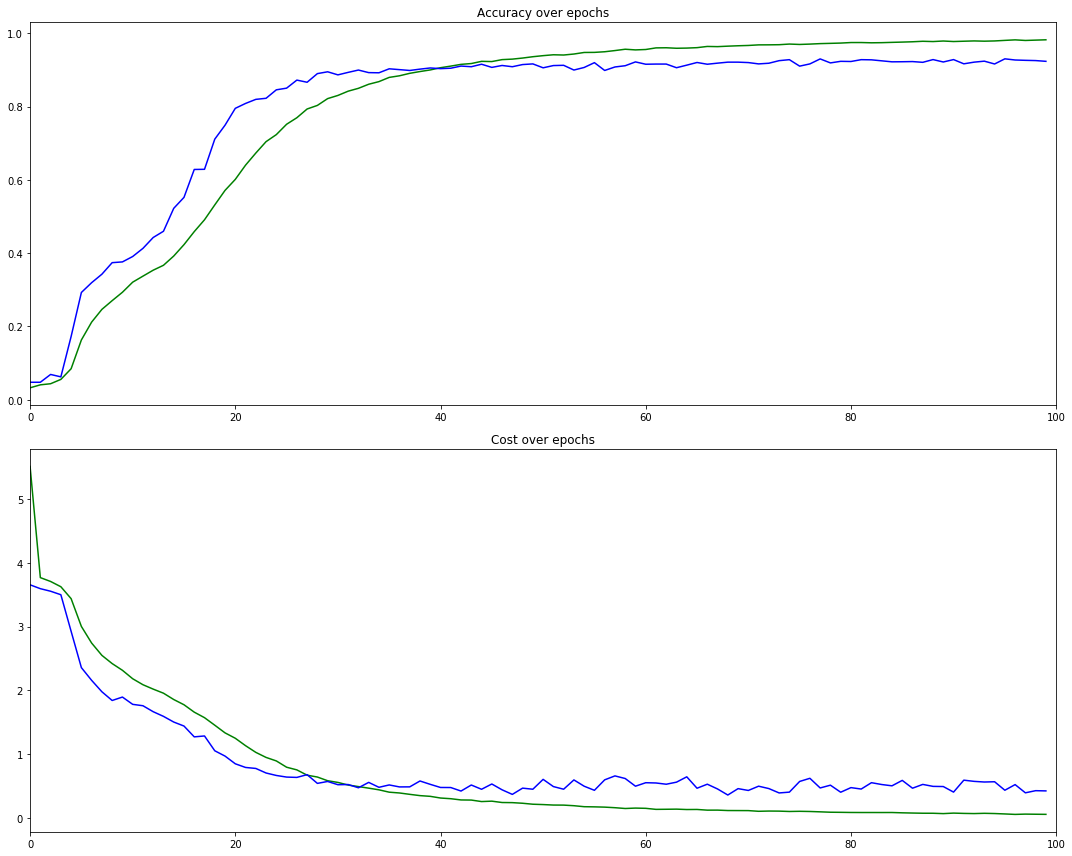

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

train_accuracy = []
train_cost = []
valid_accuracy = []
valid_cost = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        total_train_accuracy = 0
        total_train_cost = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE 
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, b, lr = sess.run([training_operation, batch, rate], feed_dict={x: batch_x, y: 
                                                                              batch_y, 
                                                                              keep_prob_conv: dropout_conv,
                                                                              keep_prob_fc : dropout_fc
                                                                             })
            training_accuracy, training_cost = sess.run([accuracy_operation, loss_operation], 
                                                        feed_dict={x: batch_x, 
                                                                   y: batch_y, 
                                                                   keep_prob_conv: dropout_conv,
                                                                   keep_prob_fc : dropout_fc
                                                                  })
            total_train_accuracy += (training_accuracy * len(batch_x))
            total_train_cost += (training_cost * len(batch_x))

        train_accuracy.append(total_train_accuracy/ num_examples)
        train_cost.append(total_train_cost/ num_examples)
        
        validation_accuracy, validation_cost = evaluate(X_valid, y_valid)
        valid_accuracy.append(validation_accuracy)
        valid_cost.append(validation_cost)
        print("EPOCH {}".format(i+1), " V Accuracy = {:.4f}".format(validation_accuracy), \
             " V Cost = {:.4f}".format(validation_cost), " T Accuracy = {:.4f}".format(train_accuracy[i]), \
             " T Cost = {:.4f}".format(train_cost[i]), " Learning = {:.5f}".format(lr))
        
    saver.save(sess, './models/traffic_model_2')
    print("Model saved")
    train_plot = plt.subplot(211)
    train_plot.set_title('Accuracy over epochs')
    train_plot.plot(train_accuracy, 'g', label="train")
    train_plot.plot(valid_accuracy, 'b', label="validation")
    train_plot.set_xlim(0, EPOCHS)
    cost_plot = plt.subplot(212)
    cost_plot.set_title('Cost over epochs')
    cost_plot.plot(train_cost, 'g', label='train')
    cost_plot.plot(valid_cost, 'b', label='validation')
    cost_plot.set_xlim(0, EPOCHS)
    plt.tight_layout()
    plt.show()

In [16]:
with tf.Session() as sess:
    saver.restore(sess, "./models/traffic_model_2")

    test_accuracy, test_cost = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

def get_features_and_labels():
    new_features = []
    new_labels = []
    for sign_label in os.listdir("./images"):
        if sign_label.startswith("."):
            continue
        img = mpimg.imread(os.path.join("./images", sign_label))
        sign_img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
        sign_img = normalize(sign_img)
        new_features.append(sign_img)
        new_labels.append(int("%s" % sign_label.split(".")[0]))

    return (np.array(new_features), np.array(new_labels))

### Predict the Sign Type for Each Image

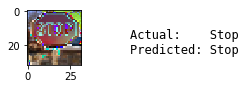

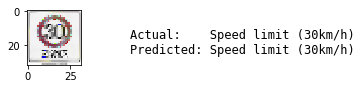

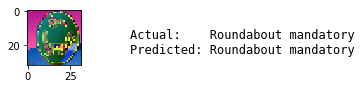

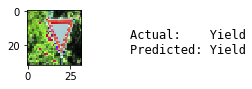

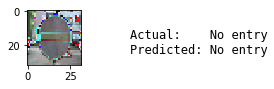

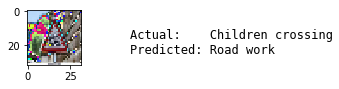

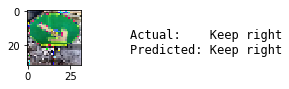

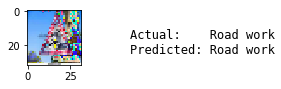

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_new, y_new = get_features_and_labels()

with tf.Session() as sess:
    saver.restore(sess, "./models/traffic_model_2")
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_new, keep_prob_conv: 1., keep_prob_fc: 1.})

    for (i, v) in enumerate(prediction):
        annotation = "Actual:    %s\nPredicted: %s" % (
            sign_names[y_new[i]], sign_names[v])
        fig = plt.figure(figsize=(1,1))
        plt.imshow(X_new[i])
        plt.annotate(annotation, xy=(0,0), xytext=(60,25), fontsize=12, family='monospace')
        plt.show()

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = sum(y_new == prediction)/len(y_new)
print("Accuracy = {:.3f}".format(100 * accuracy))

Accuracy = 87.500


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.


 Actual        - Stop


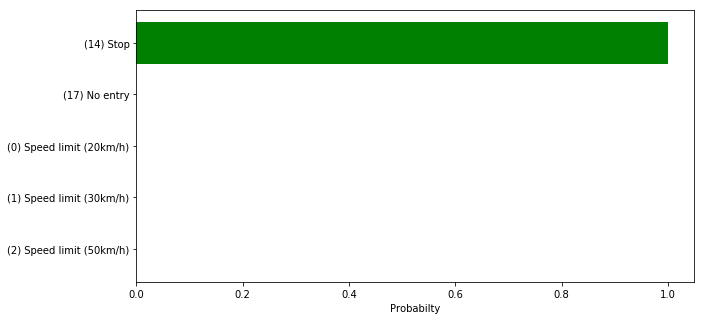


 Actual        - Speed limit (30km/h)


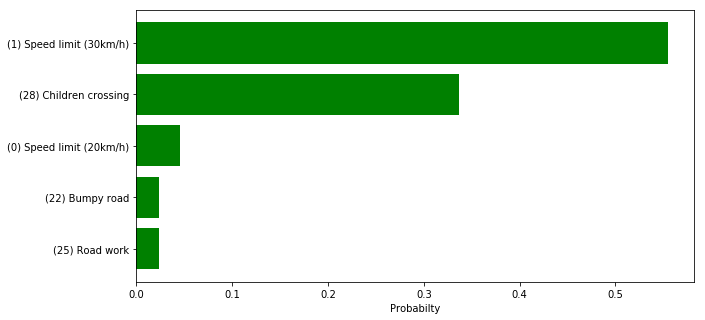


 Actual        - Roundabout mandatory


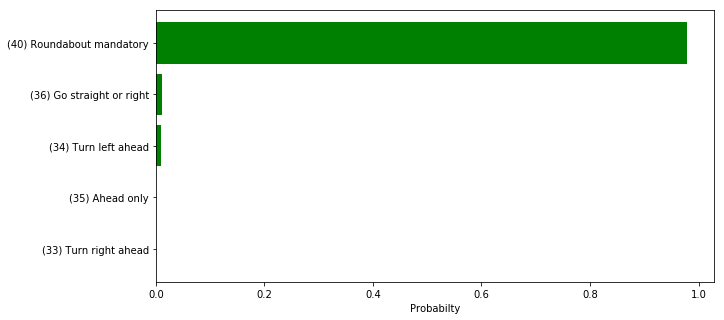


 Actual        - Yield


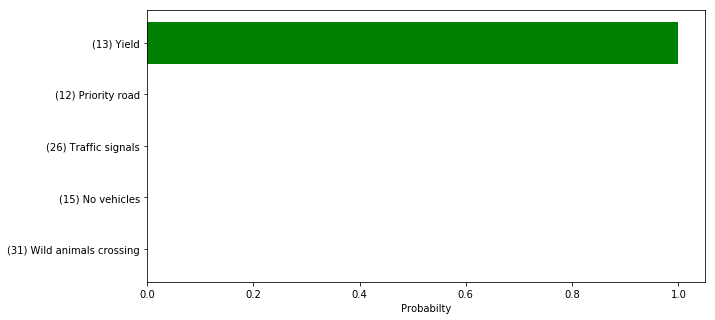


 Actual        - No entry


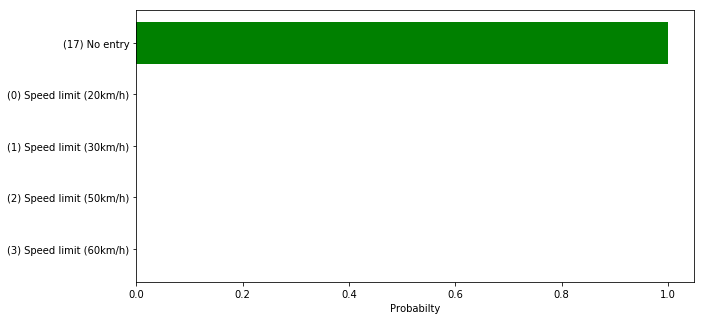


 Actual        - Children crossing


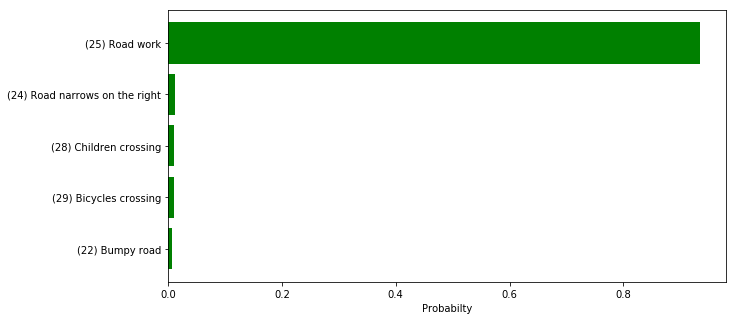


 Actual        - Keep right


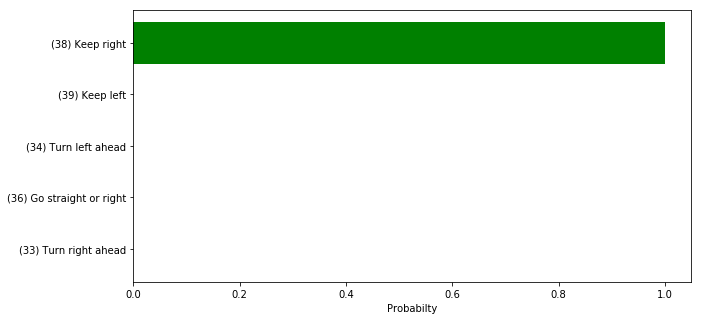


 Actual        - Road work


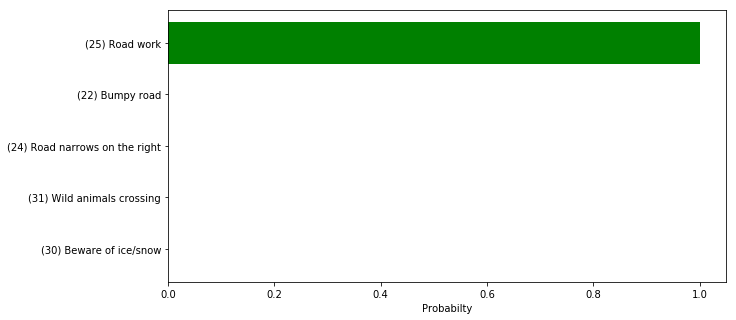

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

k = 5
top_k = tf.nn.top_k(tf.nn.softmax(logits), k=k)


def plot_prediction(labels, x_counts):
    y_labels = []
    for j in range(k):
        y_labels.append("(%s) %s" % (labels[j], sign_names[labels[j]]))
    
    plt.rcParams["figure.figsize"] = [10, 5]
    ax = plt.gca()
    y_pos = np.arange(len(y_labels))

    ax.barh(y_pos, x_counts, align='center',
        color='green', ecolor='black')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_labels)
    ax.invert_yaxis()
    ax.set_xlabel('Probabilty')
    plt.show()
    
with tf.Session() as sess:
    saver.restore(sess, "./models/traffic_model_2")
    top = sess.run(top_k, feed_dict={x: X_new, keep_prob_conv:1., keep_prob_fc:1.})

    for i in range(len(y_new)):
        print("\n Actual        -", sign_names[y_new[i]])
        plot_prediction(top[1][i], top[0][i])

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [23]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob_conv: 1., keep_prob_fc: 1.})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6, 8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

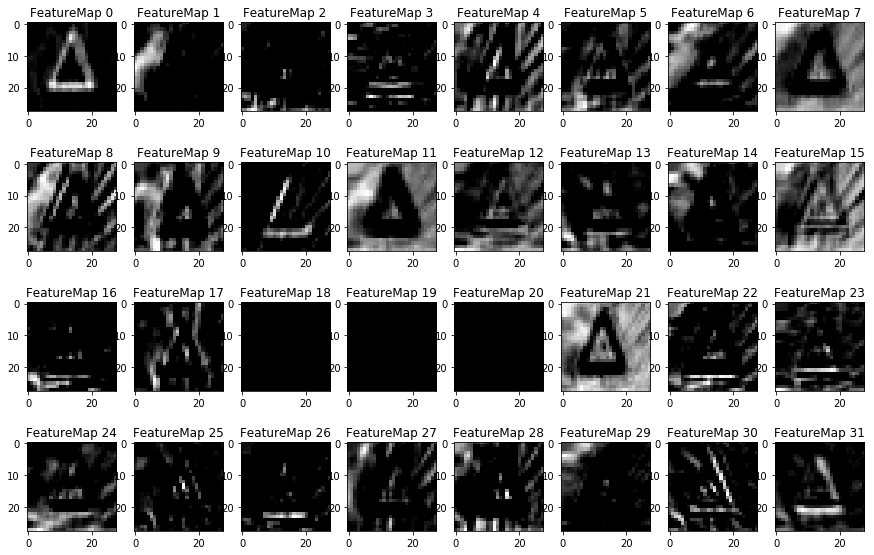

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "./models/traffic_model_2")
    img = mpimg.imread("./images/28.jpeg")
    sign_img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)    
    sign_img = normalize(sign_img)
    sign_img = np.array(sign_img, dtype=np.float)
    sign_img = np.expand_dims(sign_img, axis=0)
    outputFeatureMap(sign_img, tf.get_collection("conv_01")[0])

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 